# Life expectancy and GDP

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
from pandas.plotting import lag_plot
df = pd.read_csv('all_data.csv')
print(df.info())
print(df.describe())
print(df.Country.value_counts())
#print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country                           96 non-null     object 
 1   Year                              96 non-null     int64  
 2   Life expectancy at birth (years)  96 non-null     float64
 3   GDP                               96 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.1+ KB
None
              Year  Life expectancy at birth (years)           GDP
count    96.000000                         96.000000  9.600000e+01
mean   2007.500000                         72.789583  3.880499e+12
std       4.633971                         10.672882  5.197561e+12
min    2000.000000                         44.300000  4.415703e+09
25%    2003.750000                         74.475000  1.733018e+11
50%    2007.500000                         76.75000

As per above statistics we can see that Life expectancy and GDP dataset has 4 different variables:
1. Country - categorical nominal variable having 6 different values
2. Year - year with the range between 2000-2015
3. Life expectancy at birth (years) - numerical continuous variable describing the expected average of people's life
4. GDP - numerical descrete value of gross domestic product

All the variables do not have missing data and has the proper datatypes assigned. All the data categorical variables (all countries) has the same number of observations.

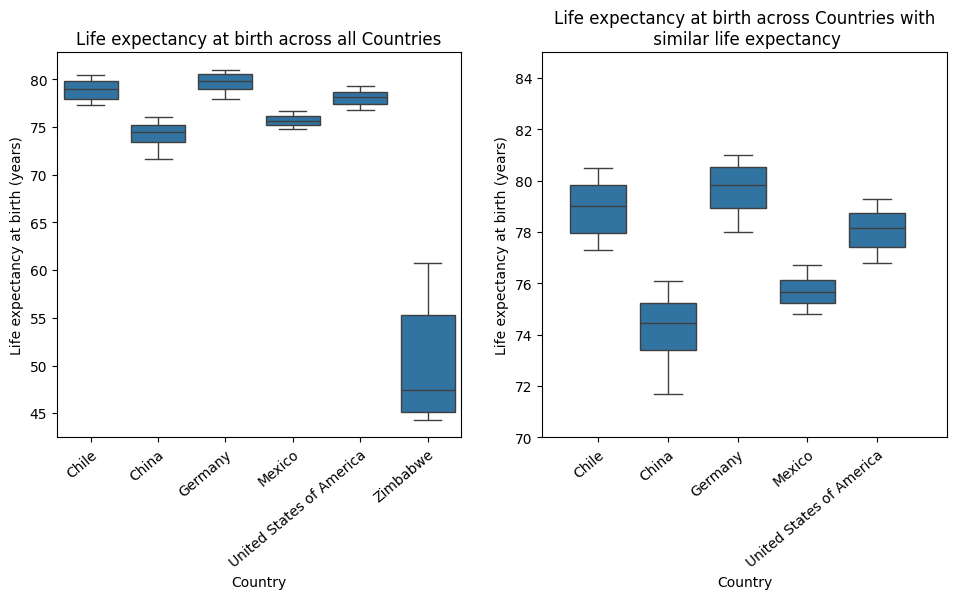

In [14]:

df["GDP_in_tn"] = df.GDP/1000000000000
countries = df.Country.unique()

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.boxplot(x=df.Country, y= df["Life expectancy at birth (years)"], data=df)
ax = plt.subplot(1,2,1)
plt.title("Life expectancy at birth across all Countries")
ax.set_xticks(range(len(countries)))
ax.set_xticklabels(countries,rotation=40,ha='right',rotation_mode='anchor')

plt.subplot(1,2,2)
sns.boxplot(x=df.Country[df.Country != 'Zimbabwe'], y= df["Life expectancy at birth (years)"][df.Country != 'Zimbabwe'], data=df)
ax = plt.subplot(1,2,2)
plt.title("Life expectancy at birth across Countries with\n similar life expectancy")
plt.axis([-0.8,5,70,85])
ax.set_xticks(range(len(countries[countries != 'Zimbabwe'])))
ax.set_xticklabels(countries[countries != 'Zimbabwe'],rotation=40,ha='right',rotation_mode='anchor')
plt.subplots_adjust(left=0.01)

plt.show()
plt.close()

Including all countries, the distribution is dominated by Zimbabwe as a strong low outlier: its median and lower whisker are far below the others, which inflates overall spread and masks differences among the remaining countries.

Removing Zimbabwe reveals that most countries cluster in a narrower band of life expectancy (roughly mid‑70s to low‑80s); Germany and the United States show the highest medians and the smallest interquartile ranges (more consistent lifespans), while China and Mexico have lower medians and somewhat larger variability and Chile sits between these groups.

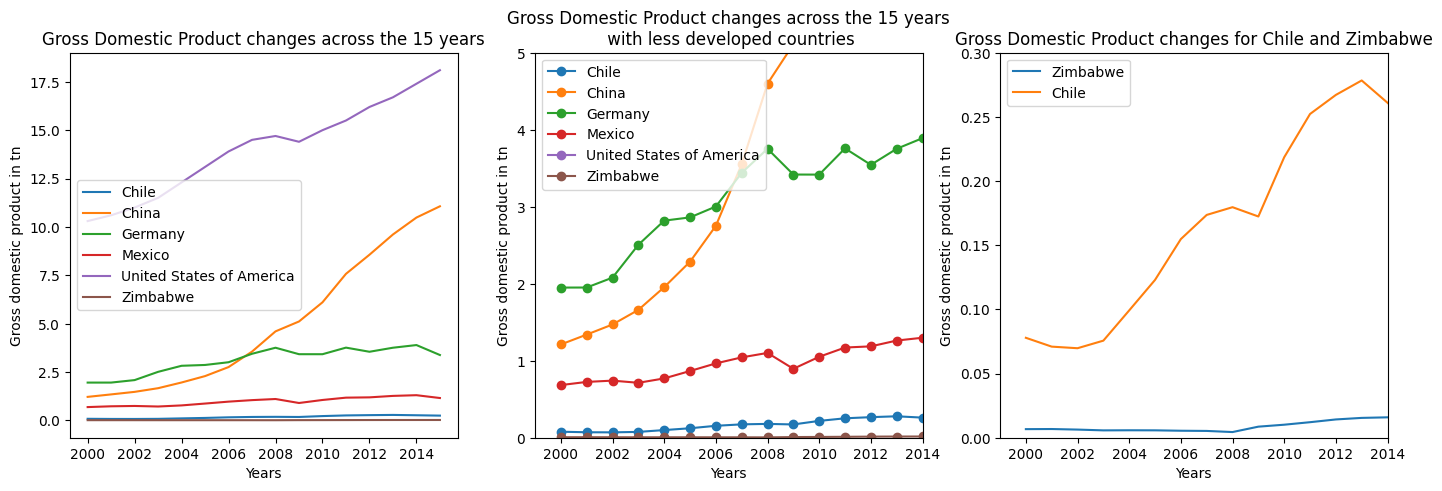

In [6]:
plt.figure(figsize=(17,5))
plt.subplot(1,3,1)
for i in countries:
    plt.plot(df.Year[df.Country==i], df["GDP_in_tn"][df.Country==i])
plt.legend(countries)
plt.xlabel('Years')
plt.ylabel('Gross domestic product in tn')
plt.title('Gross Domestic Product changes across the 15 years')

plt.subplot(1,3,2)
for i in countries:
    plt.plot(df.Year[df.Country == i], df["GDP_in_tn"][df.Country==i],marker='o')
ax = plt.subplot(1,3,2)
plt.legend(countries)
plt.xlabel('Years')
plt.ylabel('Gross domestic product in tn')
plt.title('Gross Domestic Product changes across the 15 years\n with less developed countries')
plt.axis([1999,2014,0,5])

plt.subplot(1,3,3)
ax = plt.subplot(1,3,3)
plt.plot(df.Year[df.Country =="Zimbabwe"],df["GDP_in_tn"][df.Country == 'Zimbabwe'])
plt.plot(df.Year[df.Country =="Chile"],df["GDP_in_tn"][df.Country =="Chile"])
plt.legend(['Zimbabwe','Chile'])
plt.xlabel('Years')
plt.ylabel('Gross domestic product in tn')
plt.title('Gross Domestic Product changes for Chile and Zimbabwe')
plt.axis([1999,2014,0,0.3])


plt.show()
plt.close()

- Overall trend: GDP rises for all countries between 2000–2015, with clear stratification by scale — USA largest, China rapidly catching up, Germany/Mexico mid‑range, Chile/Zimbabwe much smaller.
- China: steepest absolute growth (largest contribution to sample-wide GDP increase).
- United States: highest absolute GDP level and steady growth; growth slows around 2008–2009 (global financial crisis signal).
- Germany & Mexico: moderate, relatively stable growth trajectories with smaller year‑to‑year volatility.
- Chile vs Zimbabwe: Chile shows smooth, steady increases; Zimbabwe has a very low baseline and higher volatility with a notable proportional rise after ~2008 but remains far below Chile in absolute terms.
Short‑term events: many series show slower growth or dips circa 2008–2009 consistent with the global crisis.

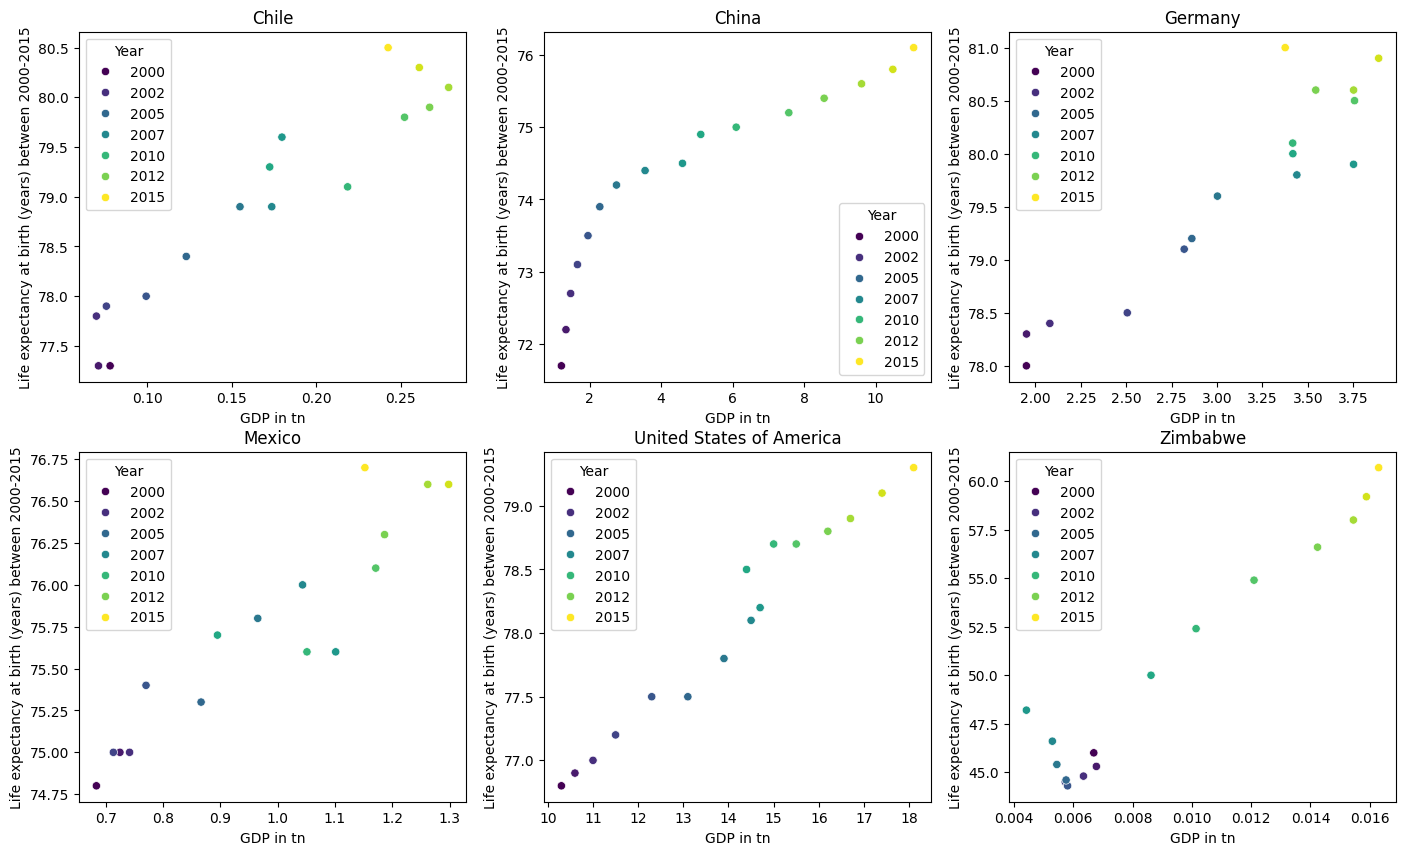

In [ ]:
plt.figure(figsize=(17,10))
plt.subplot(2,3,1)
for i in range(1,7):
    plt.subplot(2,3,i)
    sns.scatterplot(x=df.GDP_in_tn[df.Country == countries[i-1]],y=df["Life expectancy at birth (years)"][df.Country == countries[i-1]], hue=df.Year[df.Country == countries[i-1]], palette="viridis")
    plt.title(countries[i-1])
    plt.ylabel("Life expectancy at birth (years) between 2000-2015")
    plt.xlabel("GDP in tn")

plt.show()
plt.close()

- Each country’s scatter shows a generally positive GDP → life‑expectancy relationship, but strength and slope vary: China and the US show large GDP increases with only modest life‑expectancy gains, while lower‑GDP countries (Chile, Mexico) show smaller absolute GDP moves with similar or slightly larger life‑expectancy improvements proportionally.
- The year hue reveals consistent temporal movement to the right (rising GDP) and slightly upward (increasing life expectancy) for most countries — growth tends to precede or accompany modest health gains.
- Evidence of diminishing returns: large absolute GDP gains at high income levels produce smaller life‑expectancy increases than similar proportional gains at lower income levels.
- Within‑country variance is small compared with cross‑country differences for most countries; Zimbabwe is the notable exception with greater dispersion and larger life‑expectancy change over time.

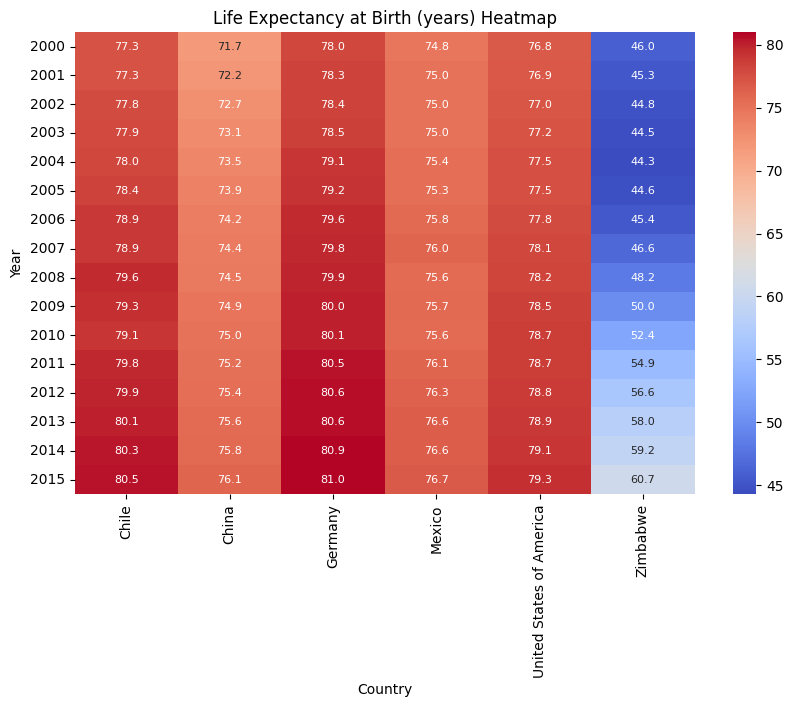

In [10]:
#
df_pivoted = df.pivot(index='Year', columns='Country', values='Life expectancy at birth (years)')
plt.figure(figsize=(10,6))
sns.heatmap(df_pivoted.sort_index(), annot_kws={'size':8}, annot=True, fmt=".1f", cmap='coolwarm')
plt.title('Life Expectancy at Birth (years) Heatmap')

plt.show()
plt.close()

- Pattern: most countries show a steady upward color shift (increasing life expectancy) across years — China, Chile, Mexico, Germany and the USA move gradually toward higher values.
- Zimbabwe stands out as a persistent low band early on with a clear upward shift later: low initial life expectancy and the largest absolute increase across the period.
- Germany and the United States are consistently in the high range with little year‑to‑year color change (stable, high life expectancy).
- China shows a steady climb from mid to higher values (substantial improvement), while Mexico and Chile sit in the mid‑range with modest increases.
- Temporal variability: life‑expectancy changes are smooth (no sharp year spikes/dips), suggesting gradual improvements rather than abrupt shocks in this metric.